<a href="https://colab.research.google.com/github/janiduc/DeapLearningMiniProject2/blob/main/DeepLearningMiniPro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import cv2
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
os.chdir("/content/drive/My Drive/")
os.getcwd()

'/content/drive/My Drive'

In [11]:
data = pd.read_csv('TeleCom_2009_2023_Daily.csv', parse_dates=['Date'])

In [12]:
data.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        18
Change %     0
dtype: int64

In [13]:
data = data.dropna()

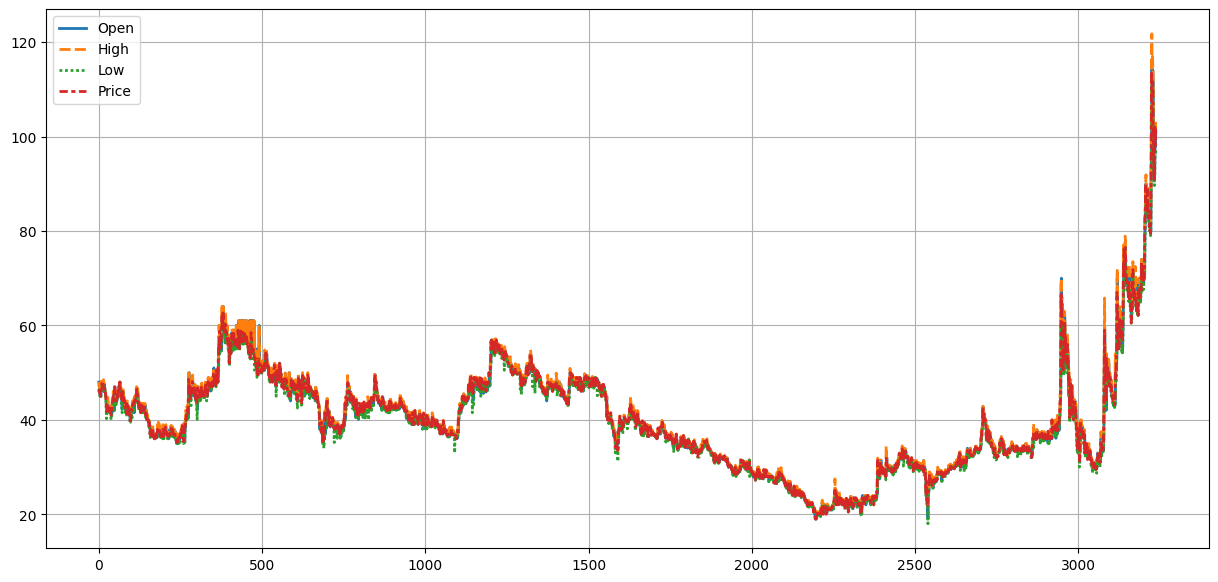

In [14]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data[['Open', 'High', 'Low', 'Price']], linewidth=2)
plt.grid(True)
plt.show()

In [15]:
df = data.filter(['Price'])

In [16]:
dataset = df.values

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [18]:
# Split the data into training and testing sets
training_data_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

In [19]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i, 0])


In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [22]:
#Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2517/2517 [==============================] - 89s 33ms/step - loss: 4.9496e-04


In [25]:
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

In [26]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 2s 16ms/step


In [28]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 24.158446820528294


In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-29-c6cb20b0ec05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


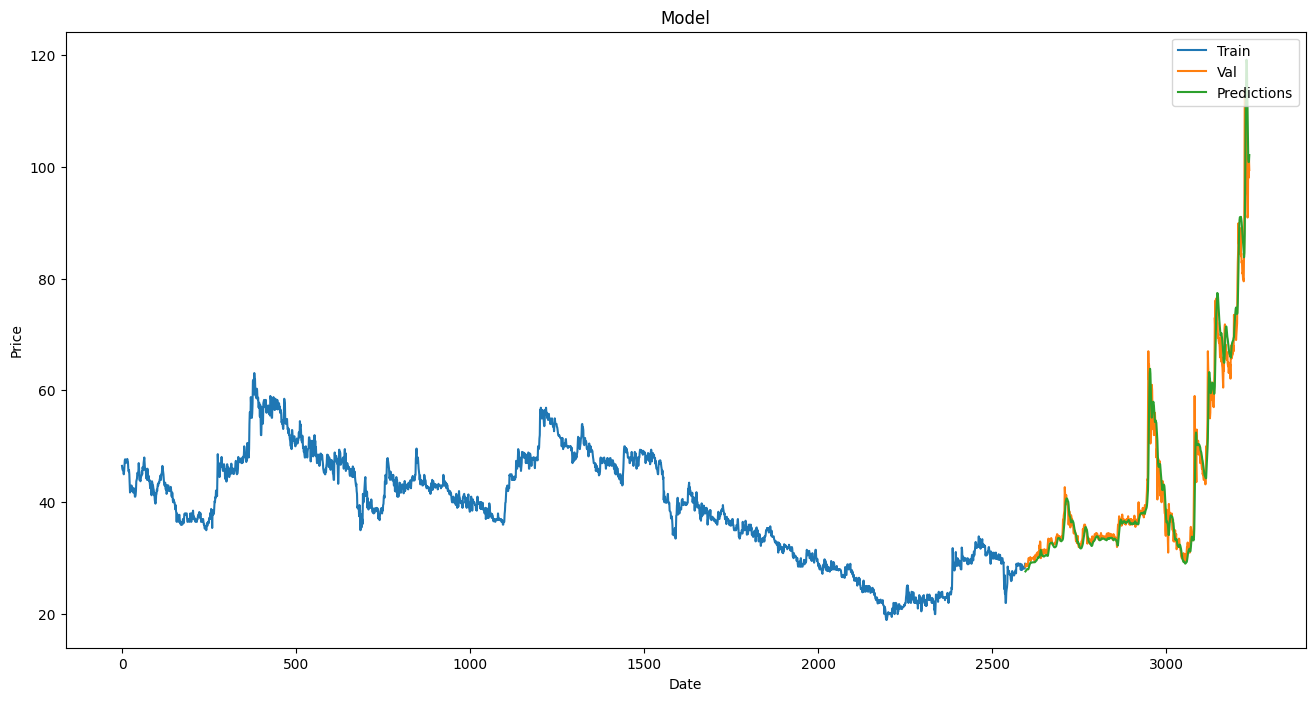

In [30]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [31]:
import pandas as pd
valid_prices = valid['Price'].to_numpy()
predicted_prices = predictions.flatten()
price_data = pd.DataFrame({'Actual Price': valid_prices, 'Predicted Price': predicted_prices})
print(price_data.to_string())


     Actual Price  Predicted Price
0           28.50        27.633961
1           29.00        27.700848
2           28.90        27.821457
3           28.80        27.930012
4           28.90        27.997282
5           28.60        28.051405
6           28.80        28.036942
7           28.70        28.027267
8           29.50        28.003138
9           30.00        28.117035
10          29.90        28.365673
11          29.80        28.619570
12          30.00        28.816816
13          30.00        28.990440
14          30.20        29.123854
15          29.50        29.251177
16          30.00        29.229273
17          30.00        29.228897
18          30.00        29.237513
19          29.90        29.248255
20          30.00        29.240122
21          30.00        29.242144
22          30.10        29.248608
23          30.00        29.274067
24          30.00        29.286764
25          30.20        29.291765
26          29.60        29.328207
27          30.50   